In [2]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
from scipy.signal import argrelextrema
import mplfinance as mpf


In [3]:
if not mt5.initialize():
    print("❌ اتصال برقرار نشد:", mt5.last_error())
else:
    print("✅ اتصال موفق به MetaTrader 5")


✅ اتصال موفق به MetaTrader 5


In [4]:
symbol = "EURUSD"
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

rates = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, start_date, end_date)
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df.head()


,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2024-05-02,1.07092,1.07294,1.06733,1.07242,53177,17,0
2024-05-03,1.07236,1.08114,1.07201,1.07624,52761,16,0
2024-05-06,1.07634,1.07897,1.07545,1.07674,37711,17,0
2024-05-07,1.07673,1.07865,1.07469,1.07536,43297,17,0
2024-05-08,1.07514,1.07566,1.07340,1.07472,41046,17,0


C:\Users\Tinati\AppData\Local\Temp\ipykernel_1064\2203095463.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_month = df.last('30D')


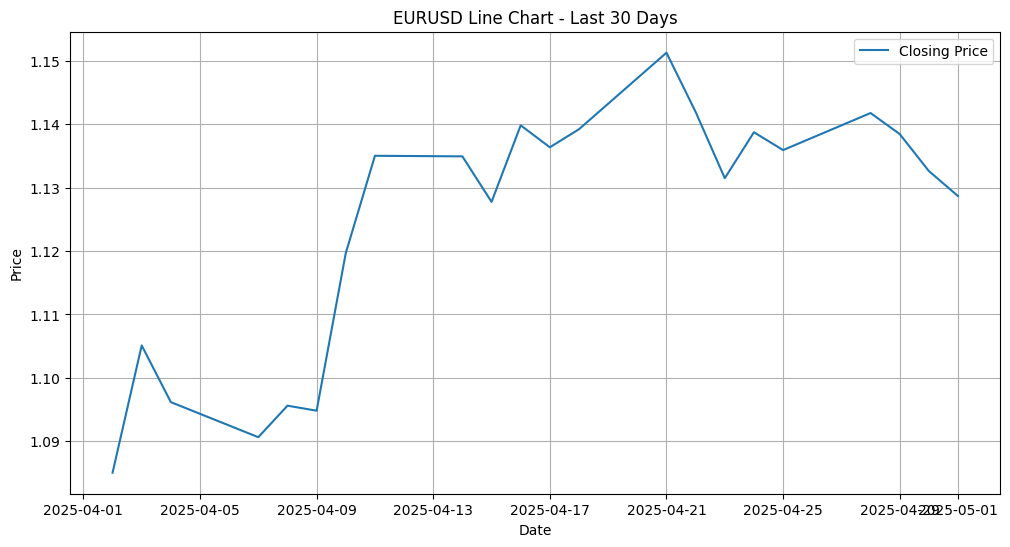

In [5]:
last_month = df.last('30D')

plt.figure(figsize=(12, 6))
plt.plot(last_month.index, last_month['close'], label='Closing Price')
plt.title('EURUSD Line Chart - Last 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
end_date = datetime.now()
start_date = end_date - timedelta(days=10)
last_week = df.loc[start_date:end_date]

if last_week.empty:
    print("❌ دیتافریم خالی است. لطفاً داده‌های بیشتری بررسی کنید.")
else:
    low_prices = last_week['Low']
    minima_mask = low_prices < low_prices.shift(1)
    minima_dates = low_prices[minima_mask].index
    minima_prices = low_prices[minima_mask].values
    if len(minima_prices) > 0:
        print(f"✅ {len(minima_prices)} کف قیمتی پیدا شد:")
        for date, price in zip(minima_dates, minima_prices):
            print(f"تاریخ: {date.strftime('%Y-%m-%d')}, کف قیمتی: {price:.5f}")
    else:
        print("⚠️ هیچ کف قیمتی پیدا نشد.")

✅ 3 کف قیمتی پیدا شد:
تاریخ: 2025-04-23, کف قیمتی: 1.13070
تاریخ: 2025-04-30, کف قیمتی: 1.13163
تاریخ: 2025-05-01, کف قیمتی: 1.12650


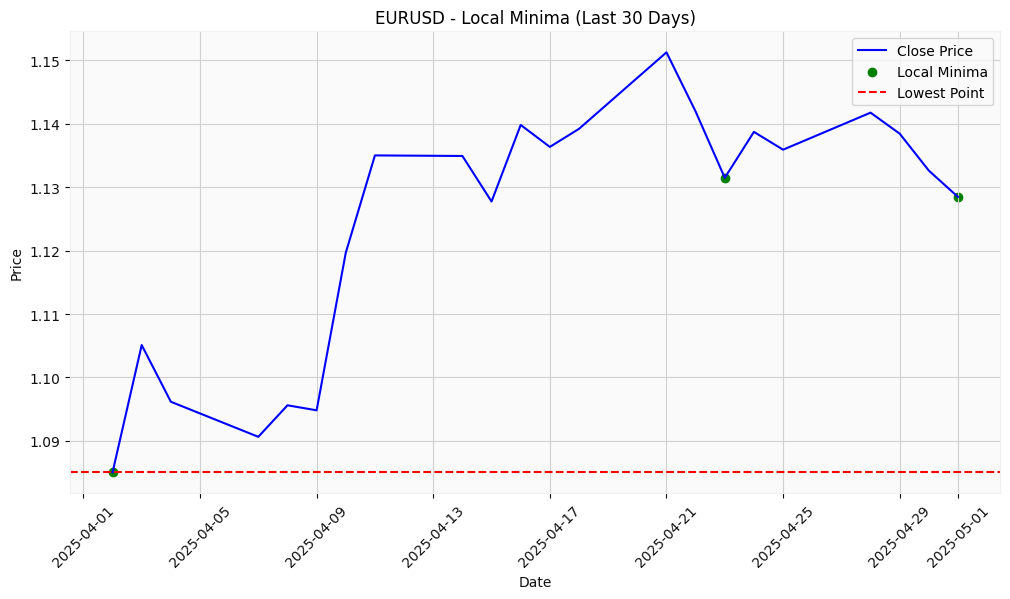

In [34]:
data['local_min'] = data.iloc[argrelextrema(data['close'].values, np.less_equal, order=5)[0]]['close']
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['close'], label='Close Price', color='blue')
plt.scatter(data['time'][data['local_min'].notna()], data['local_min'].dropna(), color='green', label='Local Minima')
plt.title(f"{symbol} - Local Minima (Last 30 Days)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.axhline(y=data['local_min'].min(), color='red', linestyle='--', label='Lowest Point')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [78]:
symbols = ["EURUSD", "GBPUSD", "AUDUSD", "USDJPY", "USDCAD" , "XAUUSD"]
today = datetime.today()
start_date = today - timedelta(days=92)
price_changes = []

In [79]:
unique_symbols = set(symbols)
for symbol in unique_symbols:
    rates = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, start_date, today)
    data = pd.DataFrame(rates)
    if not data.empty:
        data['time'] = pd.to_datetime(data['time'], unit='s')
        price_change_percentage = ((data['close'].iloc[-1] - data['close'].iloc[0]) / data['close'].iloc[0]) * 100
        price_changes.append((symbol, price_change_percentage))
    else:
        print(f"داده‌ها برای نماد {symbol} دریافت نشد.")

In [80]:
price_changes_df = pd.DataFrame(price_changes, columns=["Symbol", "Price Change (%)"])
top_5_stocks = price_changes_df.sort_values(by="Price Change (%)", ascending=False).head(5)

In [81]:
# نمایش پنج نماد با بیشترین رشد
print(top_5_stocks)

   Symbol  Price Change (%)
4  XAUUSD         15.433796
3  EURUSD          8.641072
0  GBPUSD          6.950441
2  AUDUSD          2.833395
1  USDCAD         -4.437727


In [75]:
end = datetime.now()
start = end - timedelta(days=100)
rates = mt5.copy_rates_range("EURUSD", mt5.TIMEFRAME_D1, start, end)
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')


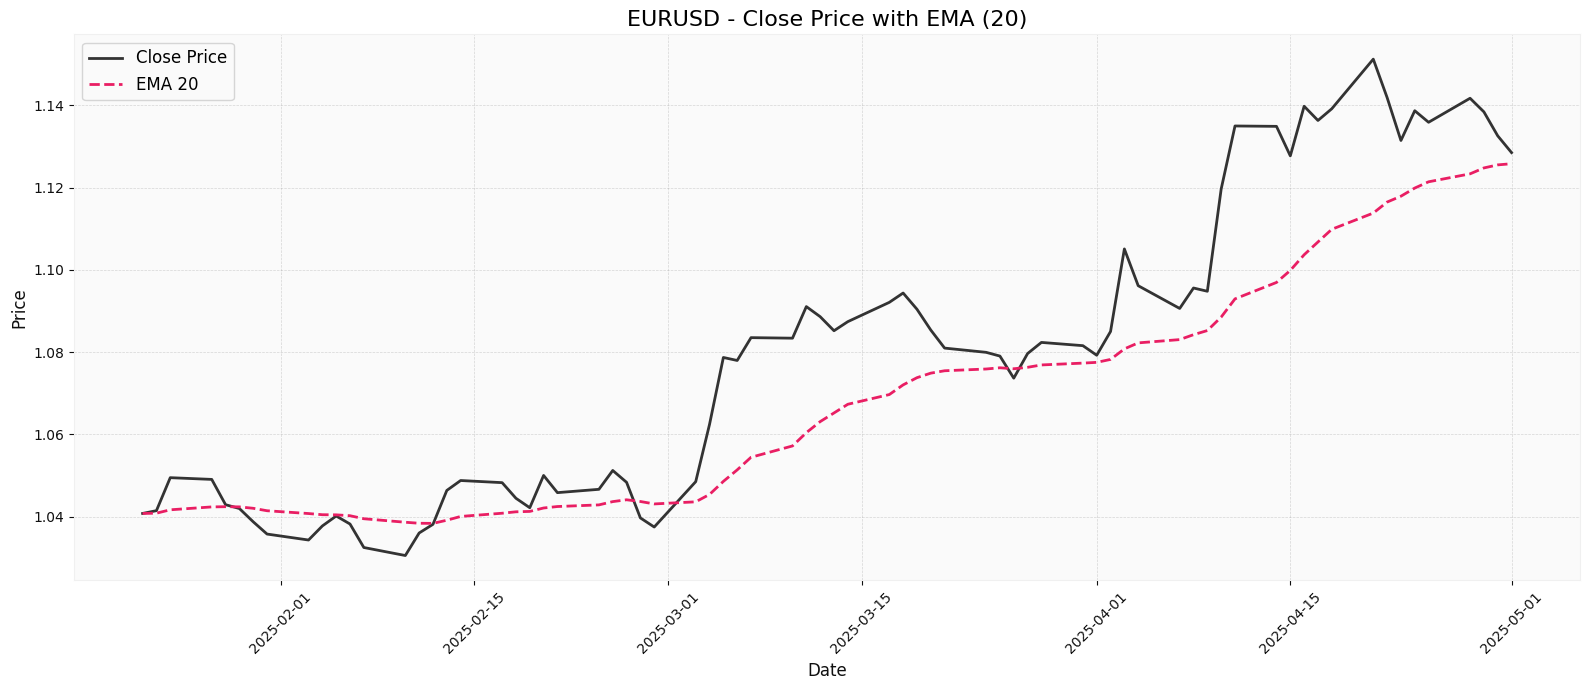

In [77]:
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(16, 7))
plt.plot(df['time'], df['close'], label='Close Price', color='#333333', linewidth=2)
plt.plot(df['time'], df['EMA_20'], label='EMA 20', color='#E91E63', linestyle='--', linewidth=2)
plt.title("EURUSD - Close Price with EMA (20)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
# پیدا کردن نقاط سقف (local maxima)
df['local_max'] = df.iloc[argrelextrema(df['close'].values, np.greater_equal, order=5)[0]]['close']

# پیدا کردن نقاط کف (local minima)
df['local_min'] = df.iloc[argrelextrema(df['close'].values, np.less_equal, order=5)[0]]['close']


سطوح مقاومتی = Price = 1.04949
سطوح مقاومتی = Price = 1.09439
سطوح مقاومتی = Price = 1.15126
سطوح حمایتی = Price = 1.04079
سطوح حمایتی = Price = 1.03056
سطوح حمایتی = Price = 1.03749
سطوح حمایتی = Price = 1.07369
سطوح حمایتی = Price = 1.13148
سطوح حمایتی = Price = 1.12853


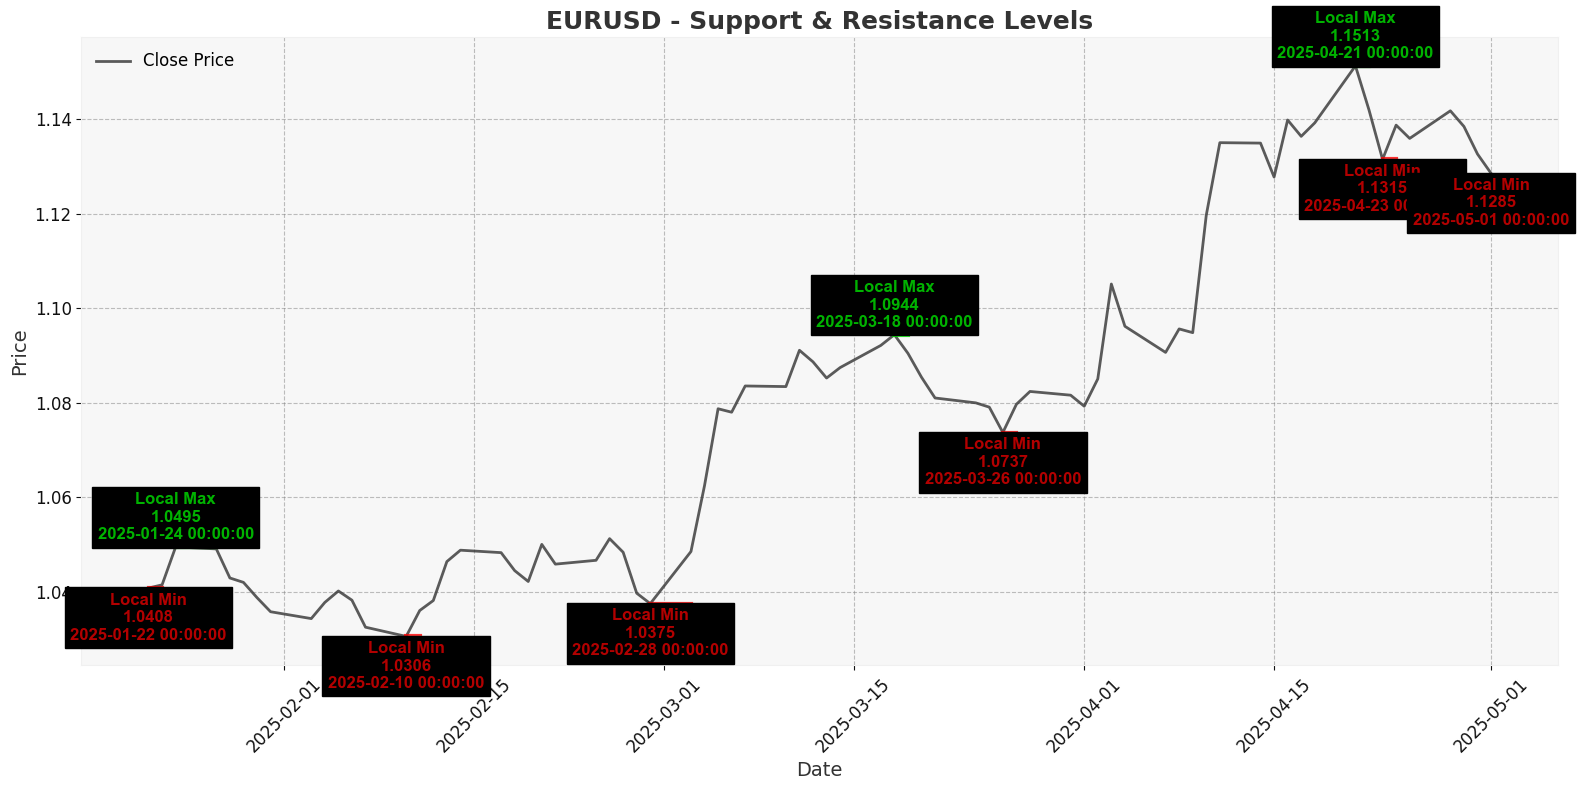

In [102]:
plt.figure(figsize=(16, 8))

plt.gca().set_facecolor('#F7F7F7')

plt.plot(df['time'], df['close'], label='Close Price', color='#333333', linewidth=2, alpha=0.8)

for index, row in df.dropna(subset=['local_max']).iterrows():
    start_time = row['time']
    start_price = row['local_max']
    end_time = df['time'][index + 1] if index + 1 < len(df) else df['time'].iloc[-1]
    plt.plot([start_time, end_time], [start_price, start_price], color='lime', linewidth=3, alpha=0.8)
    
    print(f"سطوح مقاومتی = Price = {start_price}")
    
    plt.text(start_time, start_price + 0.0010,  
             f"Local Max\n{start_price:.4f}\n{start_time.strftime('%Y-%m-%d %H:%M:%S')}",
             fontsize=12, color='lime', ha='center', va='bottom', 
             backgroundcolor='black', weight='bold', alpha=0.7, fontname="Arial")

for index, row in df.dropna(subset=['local_min']).iterrows():
    start_time = row['time']
    start_price = row['local_min']
    end_time = df['time'][index + 1] if index + 1 < len(df) else df['time'].iloc[-1]
    plt.plot([start_time, end_time], [start_price, start_price], color='red', linewidth=3, alpha=0.8)

    print(f"سطوح حمایتی = Price = {start_price}")
    
    plt.text(start_time, start_price - 0.0010,  
             f"Local Min\n{start_price:.4f}\n{start_time.strftime('%Y-%m-%d %H:%M:%S')}",
             fontsize=12, color='red', ha='center', va='top', 
             backgroundcolor='black', weight='bold', alpha=0.7, fontname="Arial")

plt.title("EURUSD - Support & Resistance Levels", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Date", fontsize=14, color='#333333')
plt.ylabel("Price", fontsize=14, color='#333333')
plt.legend(fontsize=12, loc='upper left', frameon=False)
plt.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()


In [115]:

symbols = ['EURUSD', 'GBPUSD', 'AUDUSD', 'USDCAD', 'USDJPY', 'CHFJPY', 'GBPJPY', 'AUDJPY', 'NZDUSD', 'EURGBP',
           'USDCHF', 'EURJPY', 'USDTRY', 'EURTRY', 'GBPCHF', 'AUDCAD', 'CADJPY', 'NZDJPY', 'USDMXN', 'EURAUD']

end = datetime.now()
start = end - timedelta(days=60)
positive_trend_symbols = []

USDCAD: -4.45% , روند منفی
EURGBP: 2.91% , روند منفی
USDCHF: -7.45% , روند منفی
AUDCAD: -1.95% , روند منفی
USDMXN: -5.27% , روند منفی
EURAUD: 4.90% , روند منفی


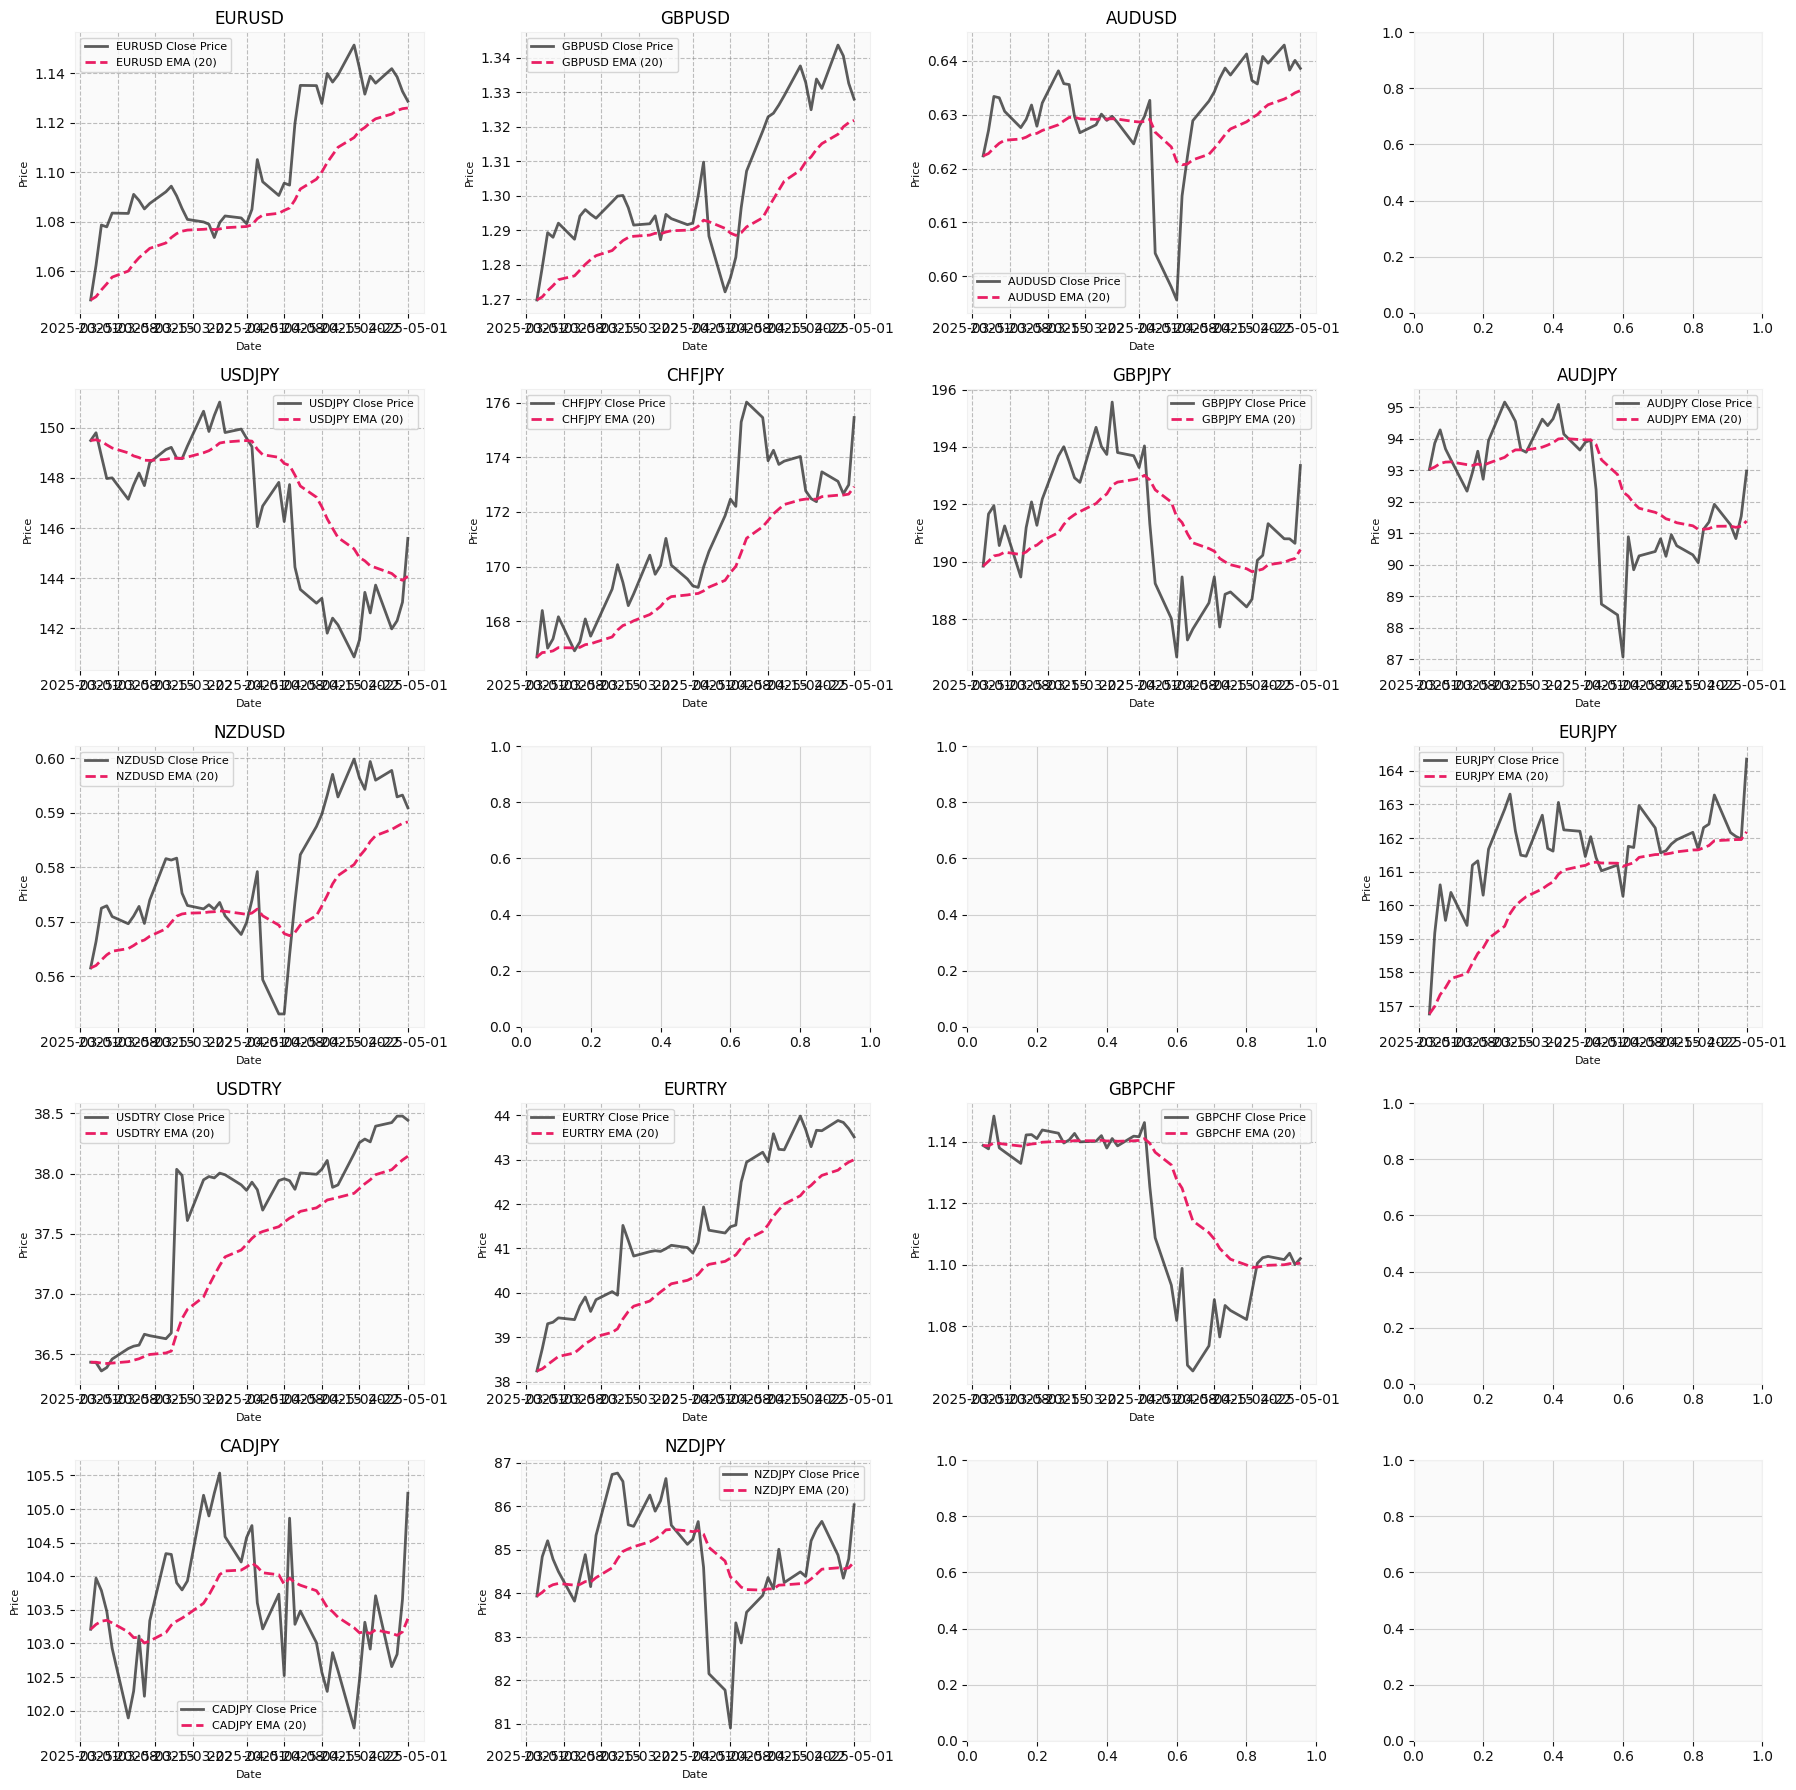

روند صعودی بر اساس EMA: ['EURUSD', 'GBPUSD', 'AUDUSD', 'USDJPY', 'CHFJPY', 'GBPJPY', 'AUDJPY', 'NZDUSD', 'EURJPY', 'USDTRY', 'EURTRY', 'GBPCHF', 'CADJPY', 'NZDJPY', 'EURUSD', 'GBPUSD', 'AUDUSD', 'USDJPY', 'CHFJPY', 'GBPJPY', 'AUDJPY', 'NZDUSD', 'EURJPY', 'USDTRY', 'EURTRY', 'GBPCHF', 'CADJPY', 'NZDJPY', 'EURUSD', 'GBPUSD', 'AUDUSD', 'USDJPY', 'CHFJPY', 'GBPJPY', 'AUDJPY', 'NZDUSD', 'EURJPY', 'USDTRY', 'EURTRY', 'GBPCHF', 'CADJPY', 'NZDJPY']


In [118]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 18))
axes = axes.flatten() 
for i, symbol in enumerate(symbols):
    rates = mt5.copy_rates_range(symbol, mt5.TIMEFRAME_D1, start, end)
    if rates is None or len(rates) == 0:
        print(f"No data available for {symbol}")
        continue
       
    df = pd.DataFrame(rates)
    df['time'] = pd.to_datetime(df['time'], unit='s')

    if len(df) < 2:
        print(f"Not enough data to calculate EMA for {symbol}")
        continue

    df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()
    
    percent_change = ((df['close'].iloc[-1] - df['close'].iloc[0]) / df['close'].iloc[0]) * 100
    if df['close'].iloc[-1] > df['EMA_20'].iloc[-1] and df['EMA_20'].iloc[-1] > df['EMA_20'].iloc[-2]:
        positive_trend_symbols.append(symbol)
        axes[i].plot(df['time'], df['close'], label=f'{symbol} Close Price', color='#333333', linewidth=2, alpha=0.8)
        axes[i].plot(df['time'], df['EMA_20'], label=f'{symbol} EMA (20)', color='#E91E63', linestyle='--', linewidth=2)
        axes[i].set_title(f"{symbol}", fontsize=12)
        axes[i].set_xlabel("Date", fontsize=8)
        axes[i].set_ylabel("Price", fontsize=8)
        axes[i].legend(fontsize=8)
        axes[i].grid(True, linestyle='--', color='gray', alpha=0.5)
    else:
        print(f"{symbol}: {percent_change:.2f}% , روند منفی")
plt.tight_layout()
plt.show()

print("روند صعودی بر اساس EMA:", positive_trend_symbols)
